## Eigenface Example for PCA descrease

In [1]:
import numpy as np
import glob 
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
categories = set()
for path in glob.glob(r'YALE\yalefaces\*'):
    categories.add(os.path.basename(path).split('.')[-1])
categories= list(categories)
prefix_name = 'subject'


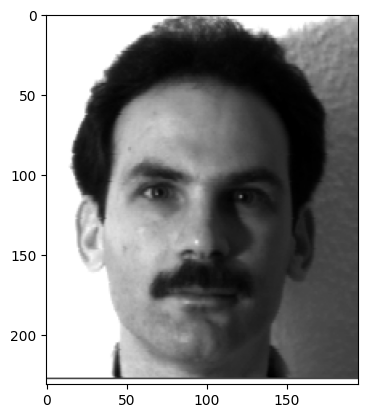

In [3]:
img = cv2.imread(f'D:/Machine learning basic/PCA/YALE/centered/{prefix_name}02.{categories[1]}.pgm')
plt.imshow(img)

In [4]:
h, w, c = img.shape
h, w, c

(231, 195, 3)

In [5]:
# create X 
X = np.zeros((h*w, 15 * len(categories)))
cnt = 0
for i in range(1, 16):
    for cag in categories:
        nb = i 
        if nb < 10: nb = f'0{i}'
        img = cv2.imread(f'D:/Machine learning basic/PCA/YALE/centered/{prefix_name}{nb}.{cag}.pgm')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        X[:, cnt] = img.reshape(w*h)
        cnt+=1


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(X.T)

PCA(n_components=100)

In [31]:
U = pca.components_.T

subject01.wink.pgm --> Done
subject01.leftlight.pgm --> Done
subject01.sleepy.pgm --> Done
subject01.centerlight.pgm --> Done
subject01.normal.pgm --> Done
subject01.surprised.pgm --> Done
subject01.glasses.pgm --> Done
subject01.rightlight.pgm --> Done
subject01.sad.pgm --> Done
subject01.happy.pgm --> Done
subject01.noglasses.pgm --> Done


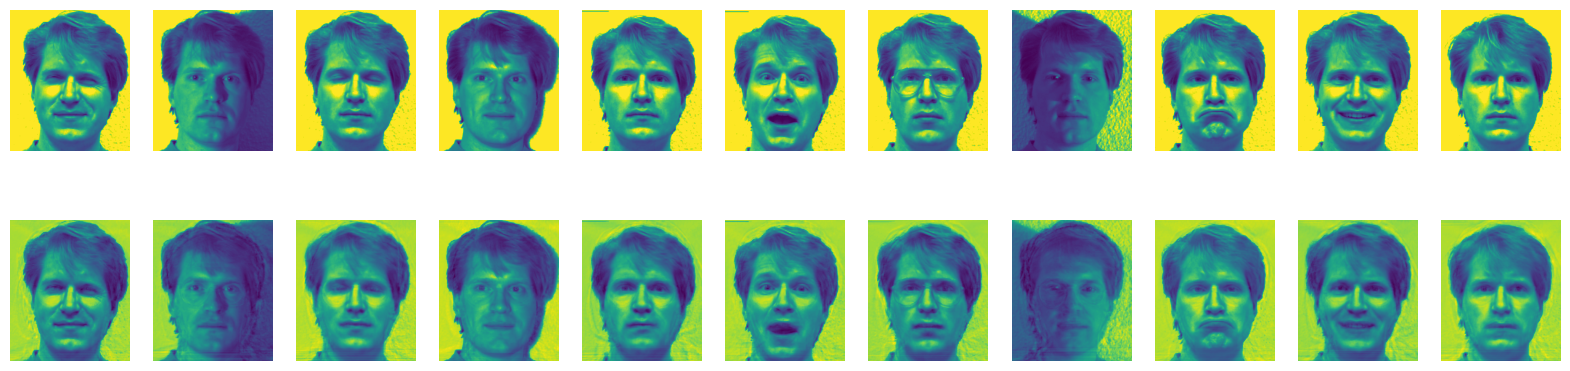

In [35]:
fix, axs = plt.subplots(2, len(categories), figsize = (20, 5))
axs = axs.flatten()
for i in range(1, 2):
    idx = 0
    for cag in categories:
        nb = i 
        if nb < 10: nb = f'0{i}'
        img = cv2.imread(f'D:/Machine learning basic/PCA/YALE/centered/{prefix_name}{nb}.{cag}.pgm')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        x =  img.reshape((w*h, 1)) - pca.mean_.reshape(w*h, 1)
        Z = U.T @ x 
        img_pca = U@Z + pca.mean_.reshape(w*h, 1)
        img_pca = img_pca.reshape((h, w))
        print(f'{prefix_name}{nb}.{cag}.pgm --> Done')
        axs[idx].imshow(img)
        axs[idx + 11].imshow(img_pca)
        axs[idx].set_axis_off()  # Loại bỏ trục X và trục Y của subplot ảnh gốc
        axs[idx + 11].set_axis_off()  # Loại bỏ trục X và trục Y của subplot ảnh PCA
        
        idx+=1
        
        